# links

ball tracking with opencv
https://www.pyimagesearch.com/2015/09/14/ball-tracking-with-opencv/

object detect from hsv color
https://blog.paralect.com/post/object-detection-image-and-video

opencv tutorial
https://docs.opencv.org/3.2.0/df/d9d/tutorial_py_colorspaces.html

why is the hue range 0 to 180 instead of 360?
https://stackoverflow.com/questions/16685707/why-is-the-range-of-hue-0-180-in-opencv

display opencv image in notebook
https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88

histogram with no outliers
https://stackoverflow.com/questions/11882393/matplotlib-disregard-outliers-when-plotting

seaborn swarmplot
https://seaborn.pydata.org/generated/seaborn.swarmplot.html

## jupyter lab shortcuts
A    new cell above  
B    new cell below  
DD   delete current cell  
M    convert cell to Markdown  

In [1]:
# For Hue
import numpy as np
import cv2
import math
from imutils.video import VideoStream

# for plotting
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# For Moab
from hat import Hat

# Helper functions

In [2]:
from sklearn.cluster import KMeans
from collections import Counter
import cv2 #for resizing image

def get_dominant_color(image, k=4, image_processing_size = None):
    """
    takes an image as input
    returns the dominant color of the image as a list
    
    dominant color is found by running k means on the 
    pixels & returning the centroid of the largest cluster

    processing time is sped up by working with a smaller image; 
    this resizing can be done with the image_processing_size param 
    which takes a tuple of image dims as input

    >>> get_dominant_color(my_image, k=4, image_processing_size = (25, 25))
    [56.2423442, 34.0834233, 70.1234123]
    """
    #resize image if new dims provided
    if image_processing_size is not None:
        image = cv2.resize(image, image_processing_size, 
                            interpolation = cv2.INTER_AREA)
    
    #reshape the image to be a list of pixels
    image = image.reshape((image.shape[0] * image.shape[1], 3))

    #cluster and assign labels to the pixels 
    clt = KMeans(n_clusters = k)
    labels = clt.fit_predict(image)

    #count labels to find most popular
    label_counts = Counter(labels)

    #subset out most popular centroid
    dominant_color = clt.cluster_centers_[label_counts.most_common(1)[0][0]]

    return list(dominant_color)


In [3]:
def disp(i):
    i1 = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10,10))
    plt.imshow(i1)
    
def disph(i):
    i1 = cv2.cvtColor(i, cv2.COLOR_HSV2RGB)
    plt.figure(figsize=(10,10))
    plt.imshow(i1)

In [4]:
hat = Hat()
hat.print_arbitrary_string("Hue\nCalibrate")
hat.enable_servos()
hat.set_servos(130,130,130)

00001 ┊ 80 48 55 45 0a 43 41 4c 49 ┊ 00 00 00 00 00 00 00 00 00 ┊ HUE¶CALI
00002 ┊ 80 42 52 41 54 45 00 00 00 ┊ 00 00 00 00 00 00 00 00 00 ┊ BRATE···
00003 ┊ 07 00 00 00 00 00 00 00 00 ┊ 00 00 00 00 00 00 00 00 00
00004 ┊ 01 00 00 00 00 00 00 00 00 ┊ 00 00 00 00 00 00 00 00 00
00005 ┊ 05 32 c8 32 c8 32 c8 00 00 ┊ 00 00 00 00 00 00 00 00 00


In [5]:
cam = cv2.VideoCapture(0)

if cam.isOpened():
    # sensor native is 4:3; capture at that ratio
    w = 384
    h = 288
    assert(math.isclose(w/h, 4/3))

    cam.set(cv2.CAP_PROP_FRAME_WIDTH, w)
    cam.set(cv2.CAP_PROP_FRAME_HEIGHT, h)
    cam.set(cv2.CAP_PROP_FPS, 10)
    cam.set(cv2.CAP_PROP_BRIGHTNESS, 60)
    cam.set(cv2.CAP_PROP_CONTRAST, 100)
    
else:
    print("error: camera is in use")


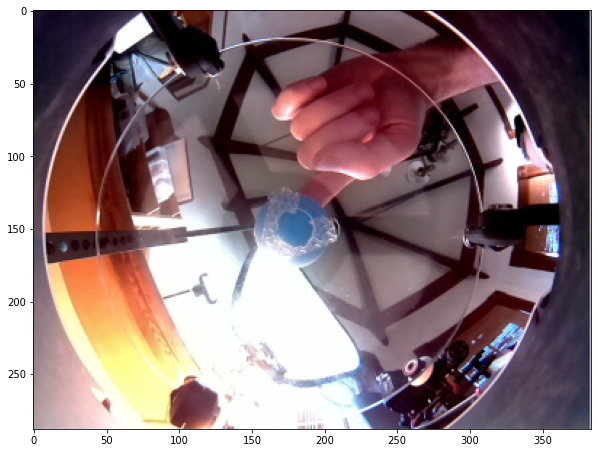

In [6]:
_, rgb = cam.read()
disp(rgb)

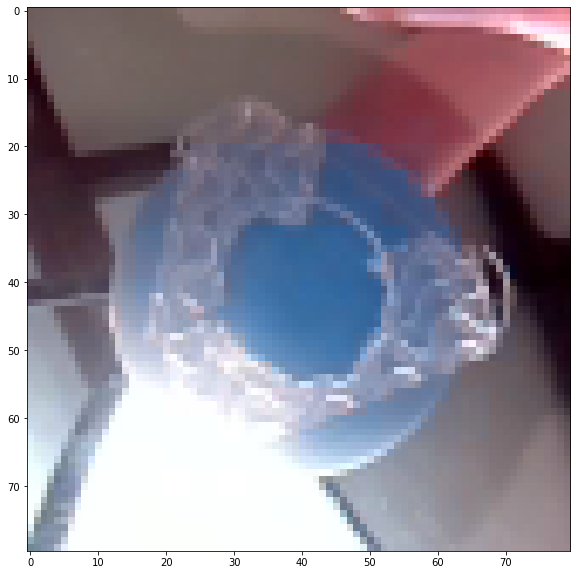

In [7]:
# destination square side 
s = 80

# will be the upper, left corner of the square, plus M1 bot offsets
x = int((w / 2 - s / 2)) 
y = int((h / 2 - s / 2))

x += -12
y += 4

# Square and shift the image
rgb_square_shift = rgb[y:y+s, x:x+s]
disp(rgb_square_shift)

[282.86514369933656, 104.4767870302137, 267.19380987472346]
Primary ball color in true HSV: 282.86514369933656


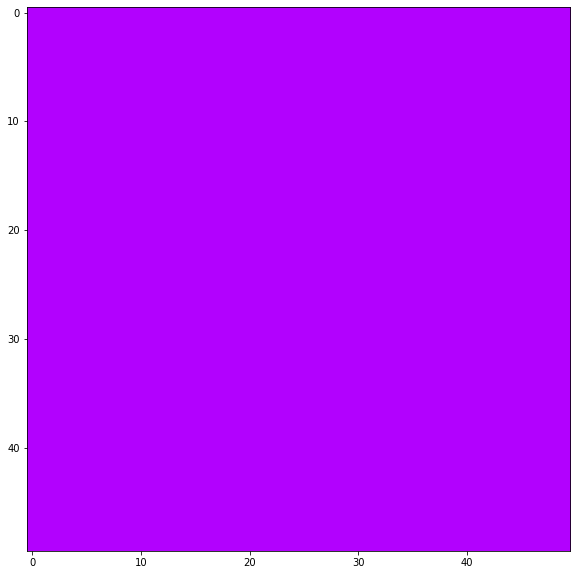

In [8]:
hsv = cv2.cvtColor(rgb_square_shift, cv2.COLOR_BGR2HSV) 

color_v = get_dominant_color(hsv)
color_v = list(map(lambda x: x*2, color_v))
print(color_v)

ballcolor = color_v[0]
print(f'Primary ball color in true HSV: {ballcolor}')

i = np.zeros((50,50,3))
i[:] = (ballcolor, 100, 100)

i[:,:,0] /= 2
i[:,:,1:] *= 255 / 100

i = np.asarray(i, dtype=np.uint8)

disph(i)

# check colors against HSV section of http://colorizer.org/
# green: 159

In [9]:
hat.lower()
hat.disable_servos()
cam.release()

00006 ┊ 05 3c 8c 3c 8c 3c 8c 00 00 ┊ 00 00 00 00 00 00 00 00 00
00007 ┊ 02 00 00 00 00 00 00 00 00 ┊ 00 00 00 00 00 00 00 00 00


In [10]:
# import detector
# d = detector.hsv_detector()
# # [print("hue={}, deetected={}, center={}, radius={}".format(h, *d(rgb, hue=h))) for h in hue_opts]

# # [(h, *d(rgb, hue=h)) for h in hue_opts]

# for el in hue_opts:
#     x = d(rgb, hue=h)
#     print(f"hue={el[0]}, detected={x[0]}, vec={}")